In [1]:
'''This Notebook generates Ext Fig 7 for the MIST manuscript, '''
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
proj_dir1 = "data_no_aug/"
proj_dir2 = "data/"
data_names = ["MouseWT", "MouseAD", "Melanoma", "Prostate"]

In [3]:
slide_perfs = []
for dn in data_names:
    fn = "%s%s/performance/slide_level_results.csv" %(proj_dir1, dn)
    df = pd.read_csv(fn)
    df["data"] = dn
    slide_perfs.append(df)
slide_perfs = pd.concat(slide_perfs)
slide_perfs['aug'] = "No augmentation"

In [4]:
slide_perfs['cvFold'] = slide_perfs['cvFold'].astype(str)
slide_perfs['label'] = slide_perfs[['data', 'cvFold']].apply(lambda x: '_'.join(x), axis=1)

In [5]:
slide_perfs2 = []
for dn in data_names:
    fn = "%s%s/performance/slide_level_results.csv" %(proj_dir2, dn)
    df = pd.read_csv(fn)
    df["data"] = dn
    slide_perfs2.append(df)
slide_perfs2 = pd.concat(slide_perfs2)
slide_perfs2['aug'] = "With augmentation"
slide_perfs2 = slide_perfs2.loc[slide_perfs2.ModelName == 'MIST',:]
slide_perfs2['cvFold'] = slide_perfs2['cvFold'].astype(str)
slide_perfs2['label'] = slide_perfs2[['data', 'cvFold']].apply(lambda x: '_'.join(x), axis=1)

In [6]:
(slide_perfs2.label.tolist() == slide_perfs.label.tolist())

True

In [7]:
slide_perfs['PCC augmented'] = slide_perfs2['PCC'].to_numpy()
slide_perfs['RMSE augmented'] = slide_perfs2['RMSE'].to_numpy()

Text(0, 0.5, 'PCC (with augmentation)')

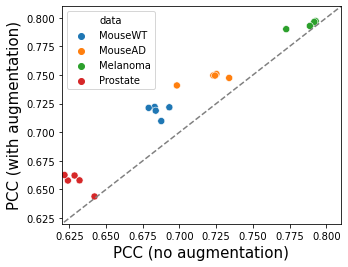

In [8]:
plt.figure(figsize=(5,4))
sns.scatterplot(data= slide_perfs, x='PCC', y="PCC augmented", s=50, hue='data')
plt.plot(np.arange(0.6, 0.82, 0.01), np.arange(0.6, 0.82, 0.01), color='gray', ls = '--')
plt.xlim(0.62, 0.81)
plt.ylim(0.62, 0.81)
plt.xlabel("PCC (no augmentation)", fontsize=15)
plt.ylabel("PCC (with augmentation)", fontsize=15)
#plt.savefig("Supp. Fig6.png", bbox_inches='tight' ,dpi=300)

In [9]:
slide_perfs.to_excel("SourceData-SuppFig6.xlsx", sheet_name='Supp. Fig6')

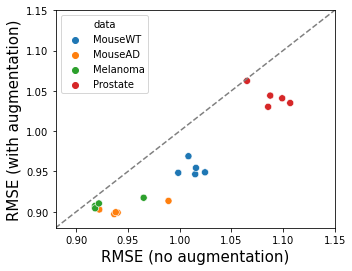

In [9]:
plt.figure(figsize=(5,4))
sns.scatterplot(data= slide_perfs, x='RMSE', y="RMSE augmented", s=50, hue='data')
plt.plot(np.arange(0.8, 1.2, 0.01), np.arange(0.8, 1.2, 0.01), color='gray', ls = '--')
plt.xlim(0.88, 1.15)
plt.ylim(0.88, 1.15)
plt.xlabel("RMSE (no augmentation)", fontsize=15)
plt.ylabel("RMSE (with augmentation)", fontsize=15)
plt.savefig("Ext_Fig7B.png", bbox_inches='tight' ,dpi=300)

In [15]:
from scipy.stats import ttest_rel
import numpy as np
print(ttest_rel(slide_perfs['RMSE'], slide_perfs['RMSE augmented']))
print(np.mean(slide_perfs['RMSE'] - slide_perfs['RMSE augmented']/slide_perfs['RMSE']))

Ttest_relResult(statistic=8.033668517944443, pvalue=1.5745167068307013e-07)
0.03546879975588883


In [16]:
print(ttest_rel(slide_perfs['PCC'], slide_perfs['PCC augmented']))

Ttest_relResult(statistic=-7.494317989230362, pvalue=4.359021319914734e-07)
